In [2]:
# Initial imports
import os
import requests
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import alpaca_trade_api as tradeapi #####Commenting the deprecated way to call the API
from alpaca_trade_api.rest import REST, TimeFrame #Current way to import Alpaca API
from dotenv import load_dotenv 
from MCForecastTools import MCSimulation
from datetime import datetime
%matplotlib inline



debugtoggle = True

In [3]:
# Load .env enviroment variables
load_dotenv()


True

### Part 1 - Personal Finance Planner

#### Collect Crypto Prices Using the requests Library


In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC  and ETH price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url).json()
response_data_eth = requests.get(eth_url).json()


price_btc = float(response_data_btc["data"]["1"]["quotes"]["CAD"]["price"])
price_eth = float(response_data_eth["data"]["1027"]["quotes"]["CAD"]["price"])

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} in CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} in CAD")


The current value of your 1.2 BTC is $36004.24 in CAD
The current value of your 5.3 ETH is $11754.61 in CAD


#### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)


In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

my_spy = 50
my_agg = 200

In [8]:
# Set Alpaca API key and secret
api_key=("PKTP7VOI9M7HGRY66IGM")

# Create the Alpaca API object
api_secret_key=("MLo0e7IV2XNfMyqXIvBZnDp8MoJJOxScMIdsyNXV")

In [9]:
# Format current date as ISO format
start_date = "2022-03-21"
end_date = "2022-03-21"

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api = REST(api_key , api_secret_key, api_version='v2')
stock_and_bond_prices = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
stock_and_bond_prices.index = stock_and_bond_prices.index.date

# Preview DataFrame
print(f'{stock_and_bond_prices.head()}')


              open     high       low   close    volume  trade_count  \
2022-03-21  107.58  107.649  106.9841  107.04   7583668        27316   
2022-03-21  444.45  446.460  440.6800  444.30  85377970       912432   

                  vwap symbol  
2022-03-21  107.310151    AGG  
2022-03-21  443.797720    SPY  


In [10]:
# Pick AGG and SPY close prices
stock_and_bond_prices = stock_and_bond_prices[["close","symbol"]]
#rslt_df = dataframe[dataframe['Percentage'] > 80]
agg_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="AGG"].iloc[0]["close"])
spy_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="SPY"].iloc[0]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,215.00
The current value of your 200 AGG shares is $21,408.00


#### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_value = my_spy_value+my_agg_value
crypto_value = my_btc_value+my_eth_value
savings_data = [shares_value, crypto_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns = ['Amount'], index = ['Shares','Crypto']) 


# Display savings DataFrame
display(df_savings)


,Amount
Shares,43623.00000
Crypto,47758.84978


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

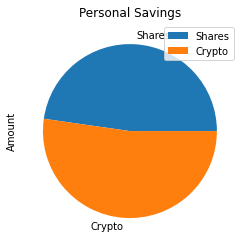

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount',title='Personal Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares_value + crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your savings fund')
elif total_savings == emergency_fund: 
    print('Congratulations! You have reached your financial goal')
else:
    diff_efund == (emergency_fund - total_savings)
    print(f"Keep up the good work... You're ${diff_efund} away from reaching your financial goal")


Congratulations! You have enough money in your savings fund


### Part 2 - Retirement Planning

#### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

##### Commenting Deprecated way to pass the start and end dates with the API
#start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

#Updated way to pass the dates with the API
start_date = "2017-03-20"
end_date = "2022-03-20"


In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api = REST(api_key , api_secret_key, api_version='v2')
df_stock_data = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
df_stock_data.index=df_stock_data.index.date
df_stock_data=df_stock_data[['close', 'symbol']]

# Display sample data
df_stock_data.head()


,close,symbol
2017-03-20,108.05,AGG
2017-03-21,108.27,AGG
2017-03-22,108.42,AGG
2017-03-23,108.45,AGG
2017-03-24,108.36,AGG


In [17]:
#Manipulating the DF to work with the MCSimulation function
pivottable = pd.pivot_table(df_stock_data, values='close', index=df_stock_data.index, columns=['symbol'])
ticker_name = list(pivottable.columns)
ticker_name = [(x,'close') for x in pivottable.columns]
micolumns = pd.MultiIndex.from_tuples(ticker_name)
pivottable.columns = micolumns
pivottable


,AGG,SPY
,close,close
2017-03-20,108.05,236.77
2017-03-21,108.27,233.73
2017-03-22,108.42,234.28
2017-03-23,108.45,234.03
2017-03-24,108.36,233.86
...,...,...
2022-03-14,107.36,417.00
2022-03-15,107.60,426.17
2022-03-16,107.68,435.55


In [18]:
# Configuring a Monte Carlo simulation to forecast thirty years cumulative returns

# Assum a traditional 40/60 portfolio using the SPY and AGG tickers to represent 
# the 60% stocks (SPY) and 40% bonds (AGG) composition of the portfolio. 

MC_thirtyyears = MCSimulation(
    portfolio_data = pivottable,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
print(f" Printing the simulation input data \n\n {MC_thirtyyears.portfolio_data.head()}")

 Printing the simulation input data 

                AGG                  SPY             
             close daily_return   close daily_return
2017-03-20  108.05          NaN  236.77          NaN
2017-03-21  108.27     0.002036  233.73    -0.012839
2017-03-22  108.42     0.001385  234.28     0.002353
2017-03-23  108.45     0.000277  234.03    -0.001067
2017-03-24  108.36    -0.000830  233.86    -0.000726


In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shahriarshochi/homeworks/API/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993898,1.001770,1.005578,0.994968,0.997724,0.993887,1.001144,1.012349,0.997558,0.997721,...,0.988768,1.001453,1.002824,1.002547,0.995248,0.998286,1.003167,0.997949,1.015191,1.002113
2,1.000767,1.013911,0.999969,1.005858,0.985975,1.009227,0.997732,1.011086,1.005050,0.992445,...,0.996371,0.979468,1.001998,1.010156,1.001085,0.998353,1.002751,0.978171,1.015481,0.999302
3,0.990332,1.019151,0.994213,0.996579,0.990368,1.012517,1.009085,1.011700,1.012083,0.989225,...,0.999128,0.977516,1.001080,1.022969,0.997255,0.996153,0.996764,0.969785,1.012411,1.003602
4,0.980655,1.024554,0.993879,0.998412,0.988380,1.013927,1.007226,0.997163,0.999968,0.982492,...,1.004900,0.978493,1.010667,1.024477,0.997278,1.001011,0.995953,0.975798,0.994479,1.016053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.698585,23.418202,1.724404,17.091082,17.866142,11.588277,5.285664,9.384186,8.199581,18.754390,...,16.143118,3.989241,30.123472,23.066080,23.710565,3.219342,15.423259,24.520365,5.512621,47.468393
7557,31.428687,23.711352,1.720764,17.129217,17.801745,11.776751,5.290467,9.358379,8.043052,18.845447,...,16.126771,3.985376,29.966042,22.908887,23.685431,3.215437,15.269276,24.602681,5.495910,48.288752
7558,31.413422,24.025490,1.714071,17.305949,17.686449,11.673942,5.315101,9.346862,8.037681,19.032450,...,16.244671,3.972131,29.855412,23.062509,23.634192,3.254030,15.256113,24.790885,5.418121,48.274629
7559,31.175938,23.991987,1.707765,17.429252,17.637130,11.718337,5.370185,9.501350,8.093724,19.150686,...,16.268382,3.961605,29.817621,23.036233,23.660802,3.253214,15.316162,24.564483,5.411124,48.670077


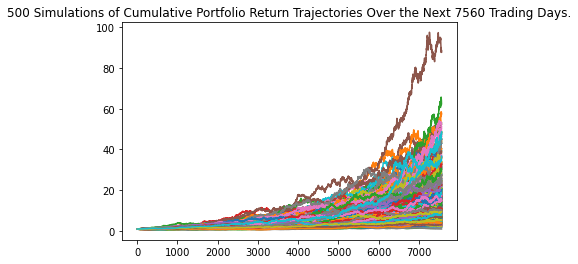

In [21]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")


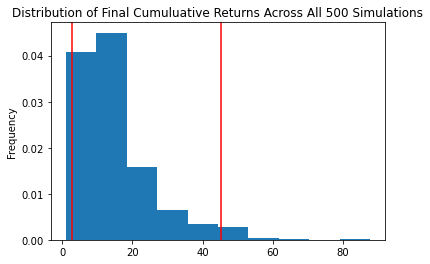

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_cumulative_return = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_cumulative_return)

count           500.000000
mean             15.029172
std              10.766005
min               1.029549
25%               7.885974
50%              12.193577
75%              18.572016
max              87.733629
95% CI Lower      2.939588
95% CI Upper     45.119902
Name: 7560, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_thirtyyears.confidence_interval.iloc[0] * initial_investment, 2)
ci_upper = round(MC_thirtyyears.confidence_interval.iloc[1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58,791.76 and $902,398.05


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.


In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_thirtyyears.confidence_interval.iloc[0] * initial_investment, 2)
ci_upper = round(MC_thirtyyears.confidence_interval.iloc[1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88,187.64 and $1,353,597.07


### Optional Challenge - Early Retirement

#### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = pivottable,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shahriarshochi/homeworks/API/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003594,0.992325,1.004746,1.013592,1.010447,0.990634,1.008705,0.989662,0.999247,0.998844,...,0.998505,0.990976,1.011435,0.994033,1.013410,1.004744,1.003820,1.008515,0.997281,1.009565
2,1.001258,1.010828,1.005255,1.016243,1.007049,0.983210,1.027586,1.005081,1.004529,1.001648,...,1.003011,0.993255,1.029237,0.995261,1.014153,1.003838,0.995837,1.011263,0.990699,1.008659
3,0.986105,1.016953,1.009303,1.022493,0.994920,0.994693,1.022326,1.004287,1.013899,1.007820,...,0.988759,0.993714,1.034675,1.004729,1.017454,1.009910,0.995286,1.011846,1.005285,1.020882
4,0.975773,1.023018,1.020937,1.019703,1.000303,0.991754,1.024987,1.011271,1.011648,0.995490,...,0.987149,0.996880,1.029876,1.001470,1.021099,1.010050,1.005656,1.021950,1.011074,1.019016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.729213,1.307260,1.857692,2.777894,1.487774,2.014498,1.450614,1.237778,2.007551,1.997118,...,2.013045,1.680158,1.317459,1.784251,1.113479,1.600558,2.272310,1.338444,1.555063,1.677137
1257,2.751083,1.299708,1.864227,2.776926,1.477909,2.029006,1.445527,1.234998,2.017534,2.001968,...,2.014829,1.684538,1.317160,1.801006,1.119360,1.586549,2.284449,1.330168,1.555357,1.683975
1258,2.720371,1.316434,1.841688,2.796774,1.495692,2.030204,1.432714,1.224113,2.048124,1.992684,...,1.997498,1.686526,1.303701,1.779245,1.124579,1.578174,2.308086,1.319719,1.555591,1.688983
1259,2.694067,1.320294,1.857364,2.814599,1.488286,2.037629,1.439625,1.234548,2.068631,2.007301,...,1.983486,1.690369,1.306801,1.778245,1.121338,1.574956,2.282592,1.324215,1.561503,1.677508


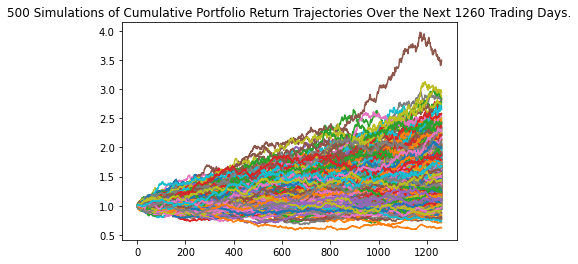

In [28]:
# Plot simulation outcomes
line_plot = MC_fiveyears.plot_simulation()
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")


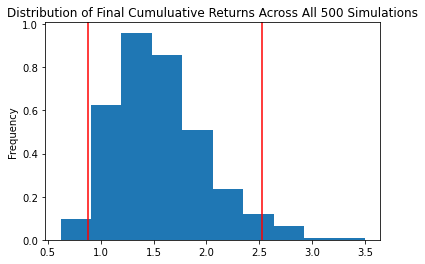

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')


In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_cumulative_return = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_cumulative_return)


count           500.000000
mean              1.560027
std               0.433266
min               0.621925
25%               1.244792
50%               1.506050
75%               1.795687
max               3.495939
95% CI Lower      0.881047
95% CI Upper      2.528292
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(MC_fiveyears.confidence_interval.iloc[0] * initial_investment, 2)
ci_upper_five = round(MC_fiveyears.confidence_interval.iloc[1] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,} and ${ci_upper_five:,}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17,620.93 and $50,565.85


#### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = pivottable,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shahriarshochi/homeworks/API/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997103,1.007786,0.986590,1.000230,1.006450,0.998103,0.992064,1.009700,0.997595,0.999415,...,1.007267,0.993409,1.011275,0.995220,1.007109,1.002762,1.009260,1.005402,0.990320,0.998754
2,0.997484,1.005569,0.979472,1.022117,1.008257,1.004017,1.007255,1.008465,1.007856,1.006993,...,1.004602,0.993558,1.001284,0.991468,1.010717,1.005132,1.012447,1.005854,0.982207,0.999500
3,0.994713,1.007797,0.988616,1.037281,1.013958,1.009911,1.008469,0.995232,1.001741,1.009207,...,1.006253,1.004518,1.007932,0.979204,1.010022,1.006124,1.001942,1.008546,0.982085,1.000979
4,0.990979,0.999210,0.989333,1.034232,1.029118,1.013381,1.003560,0.992934,1.006547,1.008543,...,1.001133,0.999693,1.005234,0.979379,1.019802,1.000249,0.998527,1.018569,0.981110,1.004919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.281705,2.504458,3.225074,4.633809,1.734227,4.503327,2.277890,2.961273,2.462736,3.669768,...,1.573537,1.223933,3.219190,1.594246,2.221016,1.322525,2.502329,2.051705,2.783727,3.736109
2517,3.274738,2.489693,3.224213,4.653140,1.731640,4.506950,2.258433,2.978945,2.463124,3.620650,...,1.584946,1.229349,3.221580,1.595022,2.226288,1.332563,2.499284,2.045441,2.792251,3.740886
2518,3.302999,2.485379,3.197457,4.700050,1.752388,4.398079,2.281579,2.987570,2.462781,3.629286,...,1.585468,1.230783,3.251142,1.590705,2.227580,1.338624,2.479812,2.053019,2.793921,3.712211
2519,3.306810,2.473753,3.177030,4.725503,1.773521,4.458267,2.281360,2.944433,2.469338,3.654076,...,1.602633,1.230040,3.225877,1.594350,2.246077,1.322315,2.471777,2.033601,2.761145,3.692212


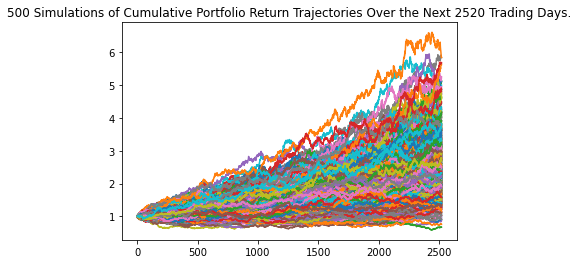

In [34]:
# Plot simulation outcomes
line_plot = MC_tenyears.plot_simulation()
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

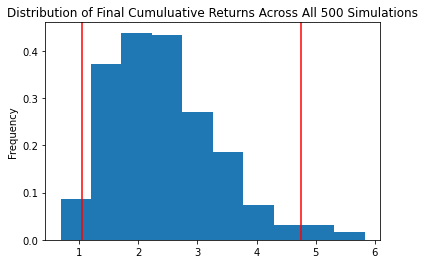

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyears.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_cumulative_return = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_cumulative_return)

count           500.000000
mean              2.426534
std               0.922498
min               0.679220
25%               1.754178
50%               2.278657
75%               2.935835
max               5.835914
95% CI Lower      1.047409
95% CI Upper      4.761444
Name: 2520, dtype: float64


In [37]:
#Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(MC_tenyears.confidence_interval.iloc[0] * initial_investment, 2)
ci_upper_ten = round(MC_tenyears.confidence_interval.iloc[1] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,} and ${ci_upper_ten:,}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20,948.19 and $95,228.88
